In [4]:
%matplotlib inline
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

Ising model

The Ising Hamiltonian can be written as,
$$H=−J\sum_{\langle ij \rangle}S_iS_j.$$

The spins $S_i$

can take values $\pm 1$,$\langle ij \rangle $ implies nearest-neighbor interaction only, $J>0$ is the strength of exchange interaction.

The system undergoes a 2nd order phase transition at the critical temperature Tc. For temperatures less than Tc, the system magnetizes, and the state is called the ferromagnetic or the ordered state. This amounts to a globally ordered state due to the presence of local interactions between the spin. For temperatures greater than Tc, the  system is in the disordered or the paramagnetic state. In this case, there are no long-range correlations between the spins.

The order parameter,
$$m=\langle S \rangle/N$$,
for this system is the average magnetization. The order parameter distinguishes the two phases realized by the systems. It is zero in the disordered state, while non-zero in the ordered, ferromagnetic, state.

In [16]:
#----------------------------------------------------------------------
##  BLOCK OF FUNCTIONS USED IN THE MAIN CODE
#----------------------------------------------------------------------
def initialstate(N):   
    ''' generates a random spin configuration for initial condition'''
    state = 2*np.random.randint(2, size=(N,N))-1
    return state


def mcmove(config, beta):
    '''Monte Carlo move using Metropolis algorithm '''
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config


def calcEnergy(config):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/4.


def calcMag(config):
    '''Magnetization of a given configuration'''
    mag = np.sum(config)
    return mag

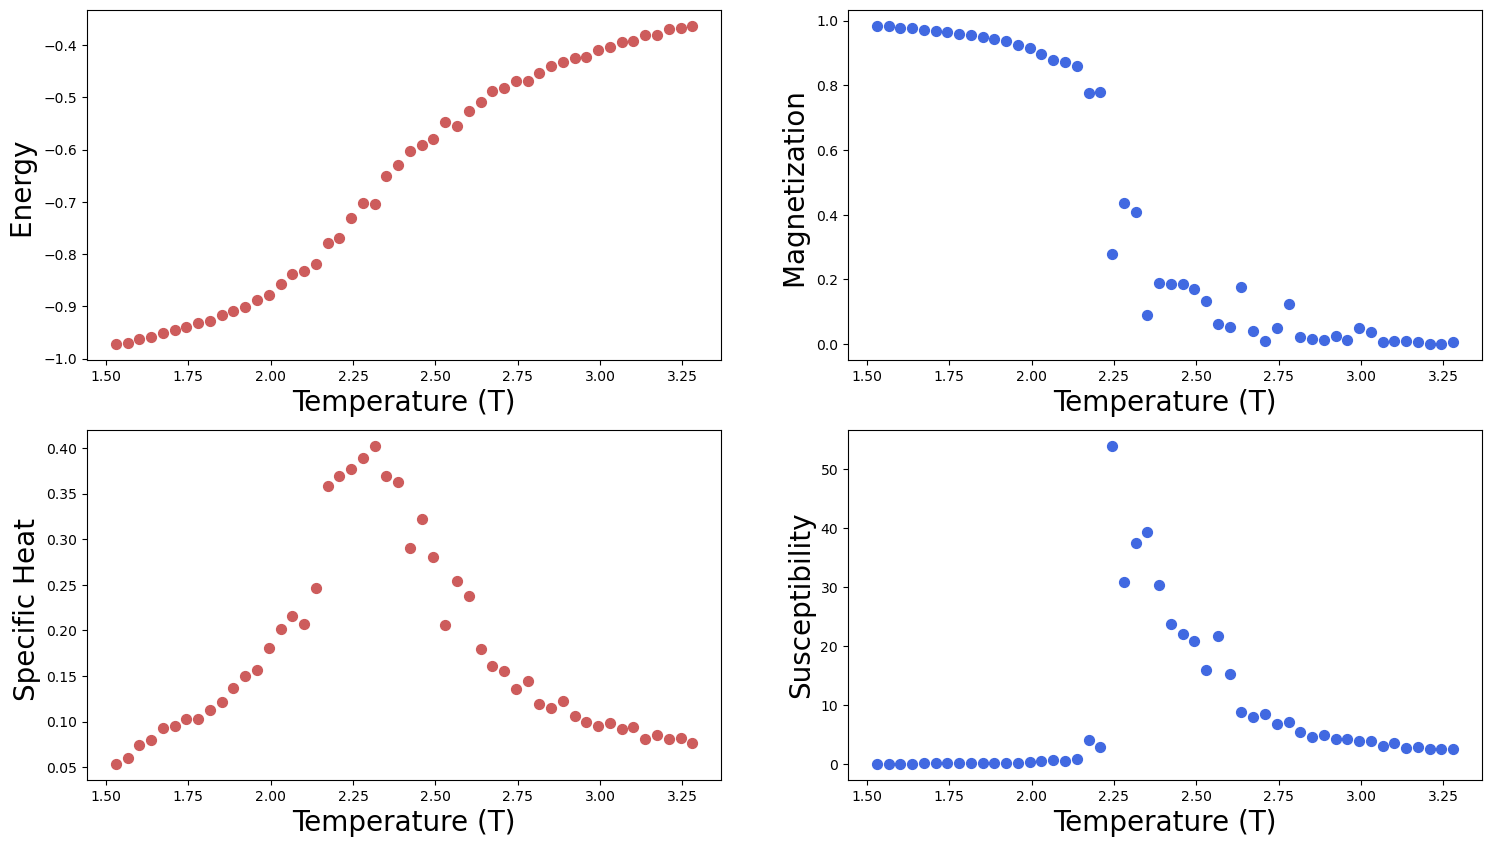

In [17]:
## change these parameters for a smaller (faster) simulation 
nt      = 50         #  number of temperature points
N       = 16         #  size of the lattice, N x N
eqSteps = 2024       #  number of MC sweeps for equilibration
mcSteps = 2024       #  number of MC sweeps for calculation

T       = np.linspace(1.53, 3.28, nt); 
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 
# divide by number of samples, and by system size to get intensive values

#----------------------------------------------------------------------
#  MAIN PART OF THE CODE
#----------------------------------------------------------------------
for tt in range(nt):
    E1 = M1 = E2 = M2 = 0
    config = initialstate(N)
    iT=1.0/T[tt]; iT2=iT*iT;
    
    for i in range(eqSteps):         # equilibrate
        mcmove(config, iT)           # Monte Carlo moves

    for i in range(mcSteps):
        mcmove(config, iT)           
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene

    E[tt] = n1*E1
    M[tt] = n1*M1
    C[tt] = (n1*E2 - n2*E1*E1)*iT2
    X[tt] = (n1*M2 - n2*M1*M1)*iT

f = plt.figure(figsize=(18, 10)); # plot the calculated values    

sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

sp =  f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');


In [13]:
%matplotlib inline
# Simulating the Ising model
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

class Ising():
    ''' Simulating the Ising model '''    
    ## monte carlo moves
    def mcmove(self, config, N, beta):
        ''' This is to execute the monte carlo moves using 
        Metropolis algorithm such that detailed
        balance condition is satisified'''
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N)
                    b = np.random.randint(0, N)
                    s =  config[a, b]
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    cost = 2*s*nb
                    if cost < 0:	
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    config[a, b] = s
        return config
    
    def simulate(self):   
        ''' This module simulates the Ising model'''
        N, temp     = 64, 1.5 #.4        # Initialse the lattice
        config = 2*np.random.randint(2, size=(N,N))-1
        f = plt.figure(figsize=(15, 15), dpi=80);    
        self.configPlot(f, config, 0, N, 1);
        
        msrmnt = 1001
        for i in range(msrmnt):
            self.mcmove(config, N, 1.0/temp)
            if i == 1:       self.configPlot(f, config, i, N, 2);
            if i == 4:       self.configPlot(f, config, i, N, 3);
            if i == 32:      self.configPlot(f, config, i, N, 4);
            if i == 100:     self.configPlot(f, config, i, N, 5);
            if i == 1000:    self.configPlot(f, config, i, N, 6);
                 
                    
    def configPlot(self, f, config, i, N, n_):
        ''' This modules plts the configuration once passed to it along with time etc '''
        X, Y = np.meshgrid(range(N), range(N))
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, config, cmap=plt.cm.rainbow);
        plt.title('Time=%d'%i); plt.axis('tight')    
    plt.show()

In [14]:
rm = Ising()

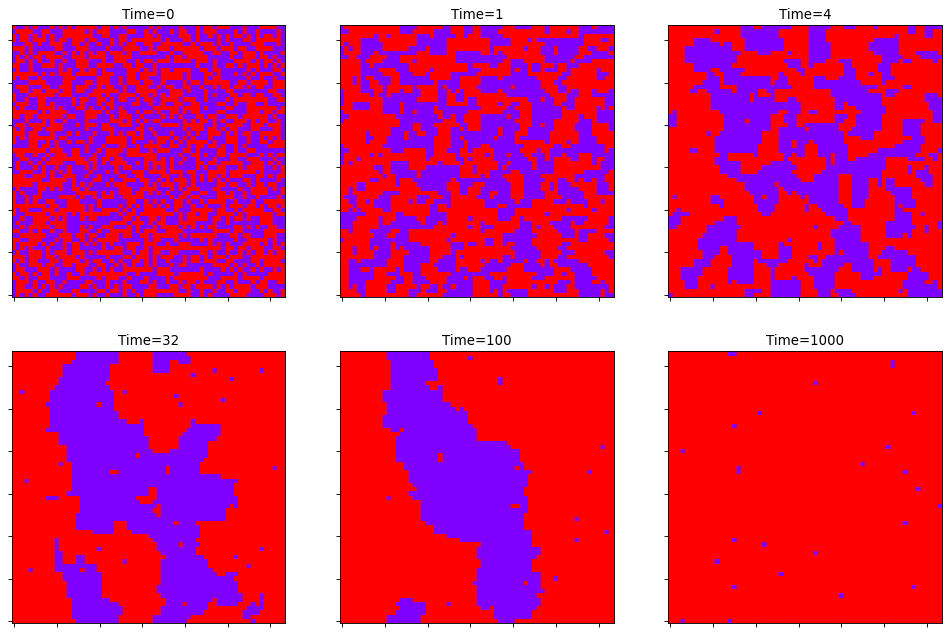

In [15]:
rm.simulate()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
class Ising:
    def __init__(self, size, choices=[-1, 1]):
        self.choices = choices
        self.size = size
        self.metric = self.createMetric(size)
        self.initial_model = self.createIsingModel(size)
        self.model = self.initial_model.copy() 
        # self.neighbor_dict = self.createNeighborDict(size)
        self.neighbor_array = self.createNeighborArray(size)
        
        
    def mcmove(self, beta, update_directly=True):
        
        ''' Execute Monte Carlo moves using the Metropolis algorithm
        with the custom metric for energy calculation. '''
        
        N = self.size      
        config = self.model.copy() if not update_directly else self.model
        
        for _ in range(N**2):  # Loop over all sites
            # Seleciona um site aleatório
            a = np.random.randint(0, N)
            b = np.random.randint(0, N)
            
            # Calcula o índice linear correspondente ao site selecionado
            index = a * N + b
            
            # Valor do spin no site selecionado
            s = config[a, b]
            
            neighbors = self.neighbor_array[index]
            valid = neighbors != -1
            valid_neighbors = neighbors[valid]
            nb = config.flat[valid_neighbors].sum()
            
            cost = 2 * s * nb
            
            # Aplica o critério de Metropolis
            if cost < 0 or np.random.rand() < np.exp(-cost * beta):
                config[a, b] *= -1
                
        if update_directly:
            self.model = config.copy()
            return self.model
        else:
            return config.copy()

    def simulate(self):   
        ''' This module simulates the Ising model'''
        N, temp     = 64, 1.5 #.4        # Initialse the lattice
        config = self.model
        f = plt.figure(figsize=(15, 15), dpi=80);    
        self.configPlot(f, config, 0, N, 1);
        
        msrmnt = 1001
        for i in range(msrmnt):
            config = self.mcmove(1.0/temp, update_directly=False)
            if i == 1:       self.configPlot(f, config, i, N, 2);
            if i == 4:       self.configPlot(f, config, i, N, 3);
            if i == 32:      self.configPlot(f, config, i, N, 4);
            if i == 100:     self.configPlot(f, config, i, N, 5);
            if i == 1000:    self.configPlot(f, config, i, N, 6);
                 
                    
    def configPlot(self, f, config, i, N, n_):
        ''' This modules plts the configuration once passed to it along with time etc '''
        X, Y = np.meshgrid(range(N), range(N))
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, config, cmap=plt.cm.rainbow);
        plt.title('Time=%d'%i); plt.axis('tight')    
        plt.show()

    def remakeMatrix(self):
        self.model = self.createIsingModel(self.size)
                
    def createMetric(self, N):
        M = np.random.randint(0,2,size=(N**2,N**2))
        M = (M + M.T)//2
        np.fill_diagonal(M, 0)
        return M

    def reset_model(self):
        ''' Reseta o modelo para o estado inicial '''
        self.model = self.initial_model.copy()
        
    def createIsingModel(self, N):
        M = np.random.choice([-1, 1], size=(N,N))
        return M

    def createNeighborDict(self, N):
        neighbor_dict = {}
        for index in range(N**2):
            neighbors = np.where(self.metric[index] == 1)[0]
            neighbor_dict[index] = neighbors.tolist()
        return neighbor_dict
    
    def createNeighborArray(self, N):
        max_neighbors = np.max(np.sum(self.metric, axis=1))
        neighbor_array = -np.ones((N**2, max_neighbors), dtype=int)
        for index in range(N**2):
            neighbors = np.where(self.metric[index] == 1)[0]
            neighbor_array[index, :len(neighbors)] = neighbors
        return neighbor_array
    
    def calcEnergy(self):
        '''Calcula a energia total de uma dada configuração utilizando a métrica personalizada de forma matricial'''
        
        config_flat = self.model.flatten()
        energy = -0.5 * np.dot(config_flat, np.dot(self.metric, config_flat))
        return energy
    
    def calcMag(self):
        '''Magnetization of a given configuration'''
        mag = np.sum(self.model)
        return mag

In [ ]:
from tqdm.notebook import tqdm  

## change these parameters for a smaller (faster) simulation 
nt      = 50         #  number of temperature points
N       = 13        #  size of the lattice, N x N
eqSteps = 2024       #  number of MC sweeps for equilibration
mcSteps = 2024       #  number of MC sweeps for calculation

T       = np.linspace(1.53, 3.28, nt); 
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 
# divide by number of samples, and by system size to get intensive values

#----------------------------------------------------------------------
#  MAIN PART OF THE CODE
#----------------------------------------------------------------------

config = Ising(size=N)

for tempPoint in tqdm(range(nt), desc="Temperaturas"):
    E1 = M1 = E2 = M2 = 0  # Inicializa acumuladores para energia e magnetização
    
    # Inicializa o modelo de Ising
    config.remakeMatrix()
    #print(f"Initial Config: {config.initial_model}")
    #print(f"Metric: {config.metric}")
    # Inverso da temperatura
    iT = 1.0 / T[tempPoint]
    iT2 = iT * iT
    
    # Equilibração com barra de progresso
    for _ in tqdm(range(eqSteps), desc=f"Equilibrando T={T[tempPoint]:.2f}", leave=False):
        config.mcmove(beta=iT, update_directly=True)
    
    # Cálculo das propriedades termodinâmicas com barra de progresso
    for _ in tqdm(range(mcSteps), desc=f"MC Steps T={T[tempPoint]:.2f}", leave=False):
        config.mcmove(beta=iT, update_directly=True)
        Ene = config.calcEnergy()     # Calcula a energia
        Mag = config.calcMag()        # Calcula a magnetização
    
        E1 += Ene
        M1 += Mag
        M2 += Mag * Mag 
        E2 += Ene * Ene
    
    # Calcula os valores intensivos
    E[tempPoint] = n1 * E1
    M[tempPoint] = n1 * M1
    C[tempPoint] = (n1 * E2 - n2 * E1 * E1) * iT2
    X[tempPoint] = (n1 * M2 - n2 * M1 * M1) * iT

    # print(config.model)

f = plt.figure(figsize=(18, 10)); # plot the calculated values    

sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

sp =  f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');
